In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from classy import Class

In [2]:
#z_pk = [800., 600., 400., 200., 100., 75., 50., 10. ,5. ,0.0]
k_out = [0.0001,0.001, 0.01, 0.1,1]
z_Nbody = [1000, 800, 600, 500, 400, 200, 100, 75, 50, 10, 5 , 0]
radiation_source = 1
gamma_source = 1
cosmo = {}
for key in z_Nbody:
    cosmo[key] = Class()
    cosmo[key].set({'output':'mPk dTk lTk', 
           'z_pk':0.0,#str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'a_init_nbody': 1./(key+1.),
           'switch_radiation_source':radiation_source,
           'switch_gamma':gamma_source,
           'radiation_streaming_approximation':3,
           'ur_fluid_approximation':2,
           'l_max_g':100,
           'l_max_ur':100,
           'l_max_pol_g':100, 
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':60,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'P_k_max_h/Mpc' : 1.,
           'evolver':0,
           'tol_perturb_integration':0.000001,
           'tol_background_integration':1e-8,
           'back_integration_stepsize':1e-3,
           'perturb_sampling_stepsize':0.01,
           'tol_thermo_integration':1e-5
            })
    cosmo[key].compute()

In [3]:
figwidth1 = 4.4 #=0.7*6.3
figwidth2 = 6.3
ratio = 8.3/11.7
figheight1 = figwidth1*ratio
figheight2 = figwidth2*ratio

lw=2
fs=12
labelfs=16

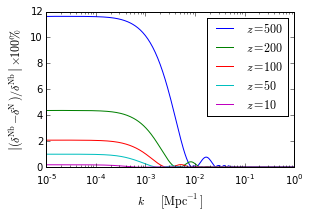

In [8]:
f, ax = plt.subplots(1,1,figsize=(figwidth1,figheight1))
leg = []
refkey = 0
cosmoref = cosmo[refkey]

href = cosmoref.h()
tkref = cosmoref.get_transfer(0.)
kref = tkref['k (h/Mpc)']*href
delnb = tkref['delta_N']

z_plot = [500, 200, 100, 50, 10]

for key in z_plot:
    if key==refkey:
        continue
    h = cosmo[key].h()
    tk = cosmo[key].get_transfer(0.)
    k = tk['k (h/Mpc)']*h
    y = np.abs(1.-tk['delta_N']/delnb)
    ax.semilogx(k,100*y)
    leg.append(r'$z='+str(key)+'$')
    
#l = ax.legend(leg,loc='upper left',ncol=1,fontsize=fs,bbox_to_anchor=(1.02, 1.035))
l = ax.legend(leg,loc='upper right',ncol=1,fontsize=fs)
ax.set_ylabel(r'$\left|(\delta^\mathrm{Nb}-\delta^\mathrm{N})/\delta^\mathrm{Nb}\right| \times 100\%$',fontsize=fs)
ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
ax.set_xlim([1e-5,1.0])
f.tight_layout()
f.savefig('deltadiff.pdf', bbox_inches='tight',bbox_extra_artists=(l,))  

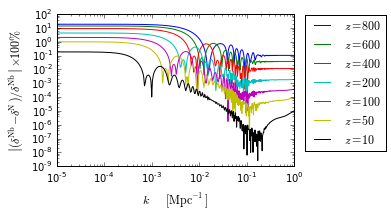

In [9]:
f, ax = plt.subplots(1,1,figsize=(figwidth1,figheight1))
leg = []
refkey = 0
cosmoref = cosmo[refkey]

href = cosmoref.h()
tkref = cosmoref.get_transfer(0.)
kref = tkref['k (h/Mpc)']*href
delnb = tkref['delta_N']

z_plot = [800, 600, 400, 200, 100, 50, 10]

for key in z_plot:
    if key==refkey:
        continue
    h = cosmo[key].h()
    tk = cosmo[key].get_transfer(0.)
    k = tk['k (h/Mpc)']*h
    y = np.abs(1.-tk['delta_N']/delnb)
    ax.loglog(k,100*y)
    leg.append(r'$z='+str(key)+'$')
    
l = ax.legend(leg,loc='upper left',ncol=1,fontsize=fs,bbox_to_anchor=(1.02, 1.035))
#l = ax.legend(leg,loc='upper right',ncol=1,fontsize=fs)
ax.set_ylabel(r'$\left|(\delta^\mathrm{Nb}-\delta^\mathrm{N})/\delta^\mathrm{Nb}\right| \times 100\%$',fontsize=fs)
ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
ax.set_xlim([1e-5,1.0])
f.tight_layout()
f.savefig('deltadifflog.pdf', bbox_inches='tight',bbox_extra_artists=(l,))  

In [10]:
h = cosmo.h()
pm = cosmo.get_primordial()
pk_prim = interp1d(pm['k [1/Mpc]'],pm['P_scalar(k)'])
def get_H_L_contribution(tk):
    k = tk['k (h/Mpc)']*h
    factor = 2*np.pi**2*pk_prim(k)/k**3
    return k,factor*np.abs((tk['L_prime']- k*tk['L'])**2 - tk['L_prime']**2)


for z in z_pk:
    tk = cosmo.get_transfer(z)
    plt.loglog(*get_H_L_contribution(tk))

AttributeError: 'dict' object has no attribute 'h'

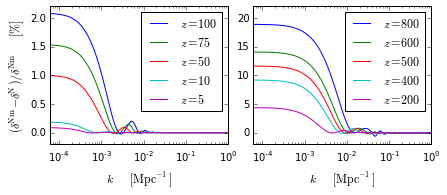

In [7]:
f, ax = plt.subplots(1,2,figsize=(figwidth2,0.9*figheight1),sharex=True)
leg1 = []
leg2 = []
refkey = 0
cosmoref = cosmo[refkey]

href = cosmoref.h()
tkref = cosmoref.get_transfer(0.)
kref = tkref['k (h/Mpc)']*href
delnb = tkref['delta_N']

z_plot = [800, 600, 500, 400, 200, 100, 75, 50, 10, 5 , 0]

for key in z_plot:
    if key==refkey:
        continue
    h = cosmo[key].h()
    tk = cosmo[key].get_transfer(0.)
    k = tk['k (h/Mpc)']*h
    y = 1.-tk['delta_N']/delnb
    if key<200:
        ax[0].semilogx(k,100*y)
        leg1.append(r'$z='+str(key)+'$')
    else:
        ax[1].semilogx(k,100*y)
        leg2.append(r'$z='+str(key)+'$')
        
#l = ax.legend(leg,loc='upper left',ncol=1,fontsize=fs,bbox_to_anchor=(1.02, 1.035))
ax[0].legend(leg1,loc='upper right',ncol=1,fontsize=fs)
ax[1].legend(leg2,loc='upper right',ncol=1,fontsize=fs)
ax[0].set_ylabel(r'$(\delta^\mathrm{Nm}-\delta^\mathrm{N})/\delta^\mathrm{Nm} \quad [\%]$',fontsize=fs)


for axi in ax:
    axi.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
ax[0].set_xlim([6e-5,1.0])
ax[0].set_ylim([-0.2,2.2])
ax[1].set_ylim([-2,22])

f.tight_layout()
f.subplots_adjust(wspace=0.14)
f.savefig('deltadiff2.pdf', bbox_inches='tight')  